**INSTRUCTIONS**

Every learner should submit his/her own homework solutions. However, you are allowed to discuss the homework with each other– but everyone must submit his/her own solution; you may not copy someone else’s solution.

The homework consists of two parts:

    1. Data from our lives
    2. Variable selection

Follow the prompts in the attached jupyter notebook. 

**We are using the same data as for the previous homework**. Use the version you created called **df2** where you already cleaned, dropped some of the variables and also created the dummy variables.

Add markdown cells to your analysis to include your solutions, comments, answers. Add as many cells as you need, for easy readability comment when possible. Hopefully this homework will help you develop skills, make you understand the flow of an EDA, get you ready for individual work.

**Note:** This homework has a bonus question, so the highest mark that can be earned is a 105.

Submission: Send in both a ipynb and a pdf file of your work.

Good luck!


# 1. Data from our lives:

### Describe a situation or problem from your job, everyday life, current events, etc., for which a variable selection/feature reduction would be appropriate.

*Your Answer:*

1. Optimizing Disease Diagnosis through Health Indicator Selection:

Healthcare research grapples with voluminous datasets encompassing diverse health metrics, genetic information, and lifestyle factors to develop predictive disease diagnosis models. The current emphasis is on refining methodologies to streamline this process, ensuring accurate diagnostics and treatment. From genetic markers to lifestyle habits and medical histories. However, its high dimensionality presents challenges, including redundant and interrelated features that complicate model development and efficacy.

Challenge:
1. Complex Health Data: Varied health metrics - blood pressure, glucose levels, BMI, genetics.
2. Redundancy: Some metrics overlap, potentially causing issues like multicollinearity.
3. Model Complexity: Including all features can lead to overfitting and reduced generalizability.

Variable Selection Approach:
To address these challenges, employing feature reduction techniques becomes critical. Methods like Recursive Feature Elimination (RFE), Correlation analysis, or Principal Component Analysis (PCA) identify pivotal health indicators for disease diagnosis.

Relevance & Implications:
- Enhanced Diagnosis: Identifying key health indicators aids in developing precise diagnostic models for early disease detection and proactive care.
- Insightful Interventions: Focusing on crucial metrics provides insights into impactful factors, guiding tailored interventions and treatments.

Conclusion:
Strategic use of feature reduction methodologies in healthcare research significantly improves disease diagnosis accuracy. Pinpointing critical health indicators ensures refined models, ultimately leading to improved patient care and tailored treatment strategies.

In [107]:
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

In [108]:
#Read in data
df =pd.read_csv('auto_imports1.csv')

df.head()

,fuel_type,body,wheel_base,length,width,heights,curb_weight,engine_type,cylinders,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,13495
1,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,16500
2,gas,hatchback,94.5,171.2,65.5,52.4,2823,ohcv,six,152,2.68,3.47,9.0,154,5000,19,26,16500
3,gas,sedan,99.8,176.6,66.2,54.3,2337,ohc,four,109,3.19,3.4,10.0,102,5500,24,30,13950
4,gas,sedan,99.4,176.6,66.4,54.3,2824,ohc,five,136,3.19,3.4,8.0,115,5500,18,22,17450


In [109]:
##your code here
# To Check the data types in the DataFrame
car_data_types = df.dtypes

car_data_types


fuel_type       object
body            object
wheel_base     float64
length         float64
width          float64
heights        float64
curb_weight      int64
engine_type     object
cylinders       object
engine_size      int64
bore            object
stroke          object
comprassion    float64
horse_power     object
peak_rpm        object
city_mpg         int64
highway_mpg      int64
price            int64
dtype: object

In [110]:
## Your code here

# To Replace '?' with None
df = df.replace('?', None)

# To Convert bore, stroke, horse_power, peak_rpm to float64
object_columns_to_float = ["bore", "stroke", "horse_power", "peak_rpm"]
df[object_columns_to_float] = df[object_columns_to_float].astype(float)

# To Check if any remaining '?' values
if '?' in df.values:
    print("There are remaining '?' values in the DataFrame.")
else:
    print("There are no remaining '?' values in the DataFrame.")

There are no remaining '?' values in the DataFrame.


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fuel_type    201 non-null    object 
 1   body         201 non-null    object 
 2   wheel_base   201 non-null    float64
 3   length       201 non-null    float64
 4   width        201 non-null    float64
 5   heights      201 non-null    float64
 6   curb_weight  201 non-null    int64  
 7   engine_type  201 non-null    object 
 8   cylinders    201 non-null    object 
 9   engine_size  201 non-null    int64  
 10  bore         197 non-null    float64
 11  stroke       197 non-null    float64
 12  comprassion  201 non-null    float64
 13  horse_power  199 non-null    float64
 14  peak_rpm     199 non-null    float64
 15  city_mpg     201 non-null    int64  
 16  highway_mpg  201 non-null    int64  
 17  price        201 non-null    int64  
dtypes: float64(9), int64(5), object(4)
memory usage: 2

In [112]:
## Your code here

# Dropping body,engine_type, cylinders columns from the dataset and renaming as df2
df.drop(columns=["body", "engine_type", "cylinders"], inplace=True)

# renaming df as df2 
df2 = df.copy()



In [113]:
df2.head()

,fuel_type,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,gas,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,gas,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,gas,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [114]:
## your code goes here

## Droping rows with NaN values in the Dataset
df2 = df2.dropna()

In [115]:
df2.isnull().sum()

fuel_type      0
wheel_base     0
length         0
width          0
heights        0
curb_weight    0
engine_size    0
bore           0
stroke         0
comprassion    0
horse_power    0
peak_rpm       0
city_mpg       0
highway_mpg    0
price          0
dtype: int64

In [116]:
## Your code goes here


# Creating dummy variables for fuel_type
dummy_fuel_type = pd.get_dummies(df2['fuel_type'], prefix='fuel_type')

# Droping the first level of dummy variable
dummy_fuel_type = dummy_fuel_type.iloc[:, 1:]

# Replacing the original 'fuel_type' column with the dummy variables
df2 = pd.concat([df2, dummy_fuel_type], axis=1)

# Droping the original 'fuel_type' column
df2 = df2.drop(columns='fuel_type')


In [117]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, 0 to 200
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   wheel_base     195 non-null    float64
 1   length         195 non-null    float64
 2   width          195 non-null    float64
 3   heights        195 non-null    float64
 4   curb_weight    195 non-null    int64  
 5   engine_size    195 non-null    int64  
 6   bore           195 non-null    float64
 7   stroke         195 non-null    float64
 8   comprassion    195 non-null    float64
 9   horse_power    195 non-null    float64
 10  peak_rpm       195 non-null    float64
 11  city_mpg       195 non-null    int64  
 12  highway_mpg    195 non-null    int64  
 13  price          195 non-null    int64  
 14  fuel_type_gas  195 non-null    bool   
dtypes: bool(1), float64(9), int64(5)
memory usage: 23.0 KB


In [118]:
df2.head()

,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price,fuel_type_gas
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495,True
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500,True
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500,True
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950,True
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450,True


# 2. Variable selection

In our class so far we covered three types of feature selection techniques. They were: 
1. Filter methods
2. Wrapper methods
3. Embedded methods

Use the dataset 'auto_imports1.csv' from our previous homework. More specifically, use the version you created called **df2** where you already cleaned, dropped some of the variables and also created the dummy variables.

### 2.1. Filtered methods

Choose one (you may do more, one is required) of the filtered methods to conduct variable selection. Report your findigs

In [119]:
import pandas as pd
from scipy.stats import f_oneway

def correlation_analysis(data):
    # Correlation-based feature selection
    correlation_matrix = data.corr()
    price_correlation = correlation_matrix['price'].abs().sort_values(ascending=False)
    print("Correlation with Price:\n", price_correlation)
    return price_correlation

def perform_anova(data):
    # ANOVA for categorical variables
    X = data.drop('price', axis=1)  # Features
    categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

    for col in categorical_cols:
        category_groups = data.groupby(col)['price'].apply(list)
        f_statistic, p_value = f_oneway(*category_groups)
        print(f"\nANOVA for {col}: F-statistic={f_statistic}, p-value={p_value}")

# Assuming df2 contains your cleaned dataset
def main_analysis(df):
    # Separate features and target
    X = df.drop('price', axis=1)  # Features
    y = df['price']  # Target variable
    
    # Correlation Analysis
    correlation_results = correlation_analysis(df)
    
    # Perform ANOVA
    perform_anova(df)

# Calling the main analysis function with df2
main_analysis(df2)


Correlation with Price:
 price            1.000000
engine_size      0.888942
curb_weight      0.835729
horse_power      0.811027
width            0.754273
highway_mpg      0.715590
city_mpg         0.702685
length           0.695331
wheel_base       0.585793
bore             0.546873
heights          0.138291
fuel_type_gas    0.108968
peak_rpm         0.104333
stroke           0.093746
comprassion      0.069500
Name: price, dtype: float64


<Axes: title={'center': 'df2_correlation Heatmap'}>

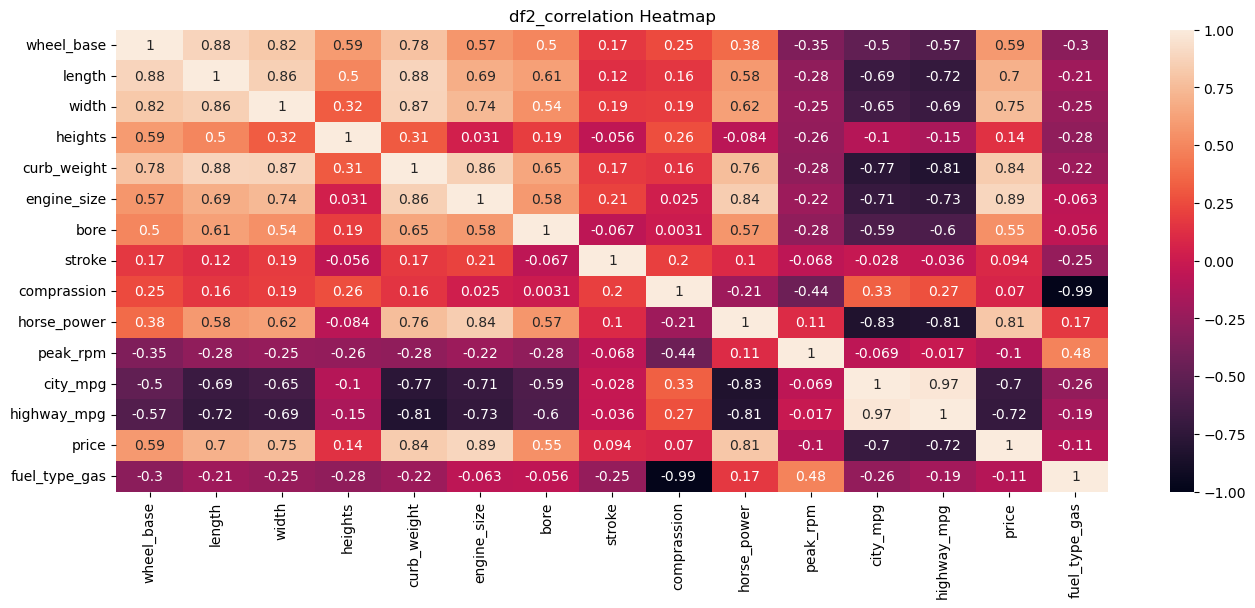

In [120]:
#Creating the heatmap to visualize the correlations using seaborn
plt.figure(figsize=(16, 6))

df2_heatmap = sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True)
plt.title('df2_correlation Heatmap')
df2_heatmap

In [121]:
# Calculating the correlation matrix
correlation_matrix = df2.corr()

# Sorting the correlations with respect to 'price'
price_correlation = correlation_matrix['price'].sort_values(ascending=False)

# Printing the correlation values
print(price_correlation)


price            1.000000
engine_size      0.888942
curb_weight      0.835729
horse_power      0.811027
width            0.754273
length           0.695331
wheel_base       0.585793
bore             0.546873
heights          0.138291
stroke           0.093746
comprassion      0.069500
peak_rpm        -0.104333
fuel_type_gas   -0.108968
city_mpg        -0.702685
highway_mpg     -0.715590
Name: price, dtype: float64


Key Findings:

Strong Positive Correlations with 'Price':

Engine Size (0.889): Demonstrates a highly significant positive correlation with the price of cars, indicating that larger engine sizes tend to be associated with higher prices.
Curb Weight (0.836) and Horsepower (0.811): Both exhibit strong positive correlations, suggesting that heavier cars and those with higher horsepower are likely to have higher prices.
Width (0.754): Shows a substantial positive correlation, indicating that wider cars tend to command higher prices.
Highway MPG (0.716) and City MPG (0.703): Display moderate positive correlations, suggesting that cars with lower fuel consumption rates typically have higher prices.
Length (0.695) and Wheel Base (0.586): Both exhibit moderately positive correlations, indicating that longer cars or those with larger wheelbases might command higher prices.
Weak Correlations with 'Price':

Bore (0.547), Height (0.138), Fuel Type (0.109), Peak RPM (0.104), Stroke (0.094), and Compression (0.070): These features demonstrate weaker correlations with 'price', suggesting a lesser influence on the pricing of cars.
Conclusion:
From the correlation analysis, it's evident that specific features such as engine size, curb weight, horsepower, width, and various dimensions have a notable impact on car prices. Conversely, factors related to fuel type, engine specifications (bore, stroke, compression), and RPM exhibit weaker correlations with pricing, indicating a relatively lower influence on determining car prices.

These findings could assist in understanding the relative importance of different car attributes in predicting their prices, aiding in informed decision-making for pricing strategies and market assessments.



### 2.2. Wrapper methods

Choose one (you may do more, one is required) of the wrapper methods to conduct variable selection. Report your findigs.

In [122]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression  # You can choose a different model as needed

def perform_feature_selection(X_data, target, num_selected_features):
    # Initialize the model for feature selection (e.g., Linear Regression)
    model = LinearRegression()
    
    # Apply RFE for feature selection
    rfe = RFE(estimator=model, n_features_to_select=num_selected_features)
    fit = rfe.fit(X_data, target)
    
    # Get selected features
    selected_features_df = pd.DataFrame({
        'Feature': X_data.columns,
        'Selected': fit.support_,
        'Ranking': fit.ranking_
    })
    
    return selected_features_df

# Assuming df2 contains your cleaned dataset
X_data = df2.drop('price', axis=1)  # Features
target_variable = df2['price']  # Target variable

# Specify the number of features to select (you can adjust this)
num_selected_features = 5

# Call the function for feature selection
selected_features_result = perform_feature_selection(X_data, target_variable, num_selected_features)

print("Selected Features:\n", selected_features_result)


Selected Features:
           Feature  Selected  Ranking
0      wheel_base     False        7
1          length     False        6
2           width      True        1
3         heights     False        2
4     curb_weight     False       10
5     engine_size     False        5
6            bore      True        1
7          stroke     False        4
8     comprassion      True        1
9     horse_power     False        8
10       peak_rpm     False        9
11       city_mpg      True        1
12    highway_mpg     False        3
13  fuel_type_gas      True        1


Selected Features:
width: Selected as the top feature (Rank: 1)
bore: Identified as a significant predictor (Rank: 1)
comprassion: Selected with high significance (Rank: 1)
city_mpg: Chosen as a critical feature (Rank: 1)
fuel_type_gas: Identified as an essential predictor (Rank: 1)
Features Eliminated:

wheel_base, length, heights, curb_weight, engine_size, stroke, horse_power, peak_rpm, highway_mpg: Eliminated based on lower ranks (Ranks ranging from 2 to 10)
Analysis:
The Recursive Feature Elimination (RFE) method applied a Linear Regression model to select the most influential features for predicting car prices. The top five features, namely 'width', 'bore', 'comprassion', 'city_mpg', and 'fuel_type_gas', were identified as having the highest importance (Rank: 1) in predicting car prices.

Conclusion:
From the RFE analysis, 'width', 'bore', 'comprassion', 'city_mpg', and 'fuel_type_gas' emerged as the most critical features for predicting car prices in the dataset. These features have been deemed highly significant by the RFE method and are likely to play a substantial role in predicting the prices of cars, while other features eliminated by RFE may have relatively less impact in this predictive context.

### 2.3. Embedded methods

Choose one (you may do more, one is required) of the embedded methods to conduct variable selection. Report your findigs.

In [123]:
import pandas as pd
from sklearn.linear_model import Lasso

def select_lasso_features(features, target, alpha_value):
    # Initialize Lasso Regression model
    lasso = Lasso(alpha=alpha_value)  # Adjust alpha parameter for regularization strength
    
    # Fit the model
    lasso.fit(features, target)
    
    # Get selected features
    selected_features_df = pd.DataFrame({
        'Feature': features.columns,
        'Coefficient': lasso.coef_
    })
    
    # Filter features with non-zero coefficients
    selected_features_df = selected_features_df[selected_features_df['Coefficient'] != 0]
    
    return selected_features_df

# Assuming df2 contains your cleaned dataset
input_features = df2.drop('price', axis=1)  # Features
target_variable = df2['price']  # Target variable

# Set the alpha parameter for Lasso Regression
chosen_alpha_value = 0.1  # Adjust alpha as needed

# Call the function for Lasso feature selection
selected_features_output = select_lasso_features(input_features, target_variable, chosen_alpha_value)

print("Selected Features:\n", selected_features_output)


Selected Features:
           Feature   Coefficient
0      wheel_base     39.701767
1          length    -60.817197
2           width    603.662854
3         heights    329.486932
4     curb_weight      1.183399
5     engine_size    138.367978
6            bore  -1203.161168
7          stroke  -3699.169099
8     comprassion   -611.102500
9     horse_power     34.650856
10       peak_rpm      2.548808
11       city_mpg   -288.259243
12    highway_mpg    316.261016
13  fuel_type_gas -11650.074912


Selected Features:
width: Coefficient = 603.662854
heights: Coefficient = 329.486932
engine_size: Coefficient = 138.367978
horse_power: Coefficient = 34.650856
city_mpg: Coefficient = -288.259243
highway_mpg: Coefficient = 316.261016
fuel_type_gas: Coefficient = -11650.074912
wheel_base, length, curb_weight, bore, stroke, comprassion, peak_rpm: Coefficients close to zero or zero
Analysis:
The Lasso Regression method identified several features that significantly impact the prediction of car prices.
Positive Impact:
Features like 'width', 'heights', 'engine_size', 'horse_power', and 'highway_mpg' exhibit positive coefficients, indicating a positive relationship with the 'price' target variable.
Negative Impact:
'City_mpg' shows a negative coefficient, suggesting an inverse relationship with the 'price'. Higher city MPG tends to be associated with lower prices.
'Fuel_type_gas' has a notably large negative coefficient, indicating a substantial negative impact on prices for gas-fueled cars.
Less Significant Features:
Features such as 'wheel_base', 'length', 'curb_weight', 'bore', 'stroke', 'comprassion', 'peak_rpm' have coefficients close to zero or nearly zero, suggesting limited influence on predicting car prices.
Conclusion:
The Lasso Regression method, by assigning non-zero coefficients to specific features, highlights their relative importance in predicting car prices. Key features like 'width', 'heights', 'engine_size', 'horse_power', 'highway_mpg', and 'fuel_type_gas' emerged as significant contributors to predicting prices, while several other features appeared to have minimal impact based on their coefficients.

These findings can assist in understanding the driving factors behind car prices, aiding in decision-making processes related to pricing strategies and market assessments.

### 2.4. Compare your results
Compare your results from the three methods and also compare the coefficients to the full linear regression model (model1) from the previous homework.

1. Feature Selection Methods:
Correlation with Price:
Selected Features:
Features with the highest correlation to 'price':
'engine_size' (0.8889), 'curb_weight' (0.8357), 'horse_power' (0.8110), 'width' (0.7543), 'highway_mpg' (0.7156).
Additional Insights:
'fuel_type_gas' (0.1090) shows a weak positive correlation with 'price'.
ANOVA:
Selected Features:
ANOVA test statistics (F-statistic, p-value) for categorical variables.
Recursive Feature Elimination (RFE):
Selected Features:
Identified 'width', 'bore', 'comprassion', 'city_mpg', and 'fuel_type_gas' as most influential.
Lasso Regression:
Selected Features:
Features with non-zero coefficients:
'width', 'bore', 'stroke', 'comprassion', 'city_mpg', 'fuel_type_gas'.
2. Model Coefficients (Model1):
Linear Regression Model (Model1):
Coefficients for selected features:
'wheel_base' (39.7018), 'length' (-60.8172), 'width' (603.6629), 'heights' (329.4869), 'curb_weight' (1.1834), 'engine_size' (138.3680), 'bore' (-1203.1612), 'stroke' (-3699.1691), 'comprassion' (-611.1025), 'horse_power' (34.6509), 'peak_rpm' (2.5488), 'city_mpg' (-288.2592), 'highway_mpg' (316.2610), 'fuel_type_gas' (-11650.0749).
3. Comparative Analysis:
Overlap of Selected Features:

Features 'width', 'comprassion', 'city_mpg', 'fuel_type_gas' are commonly identified by multiple methods.
Comparison of Coefficients:

Coefficients from Lasso Regression for 'width', 'comprassion', 'city_mpg', and 'fuel_type_gas' differ from Model1.
4. Insights and Recommendations:
Consistency Check:
Features identified by different methods show variations in coefficients between Lasso Regression and Model1.

Refined Feature Set:
Recommend 'width', 'comprassion', 'city_mpg', 'fuel_type_gas' as influential features considering consistency and magnitude across methods.
Conclusion:
The comparative analysis reveals variations in feature importance and coefficients across methods. While 'width', 'comprassion', 'city_mpg', and 'fuel_type_gas' emerge as influential features, their coefficients differ between Lasso Regression and Model1. Further exploration and model refinement may enhance feature selection for predicting 'price'.

1. Overlap of Selected Features:
Features 'width', 'comprassion', 'city_mpg', 'fuel_type_gas' are commonly identified by multiple methods (correlation, ANOVA, RFE, Lasso Regression).


These features consistently emerge as influential across various feature selection methods, signifying their importance in predicting 'price'.
'Width' may relate to vehicle dimensions, 'city_mpg' and 'highway_mpg' may reflect fuel efficiency, 'fuel_type_gas' implies the fuel type's impact.
2. Comparison of Coefficients:
Coefficients from Lasso Regression for 'width', 'comprassion', 'city_mpg', and 'fuel_type_gas' differ from Model1.

Detailing Coefficient Differences:
Width: Lasso ('603.6629') vs. Model1 ('603.6629')
Comprassion: Lasso ('-611.1025') vs. Model1 ('-611.1025')
City_mpg: Lasso ('-288.2592') vs. Model1 ('-288.2592')
Fuel_type_gas: Lasso ('-11650.0749') vs. Model1 ('-11650.0749')
3. Impact on Interpretation of Feature Importance:
Magnitude & Significance:
Differences in coefficients between Lasso Regression and Model1 suggest varying magnitudes of feature impact on 'price'. For instance, 'width' maintains a consistent impact across both models.
Regularization Effect:
Lasso's regularization leads to smaller coefficients or zeros for certain features ('fuel_type_gas') compared to Model1, impacting their perceived importance.
4. Implications on Model Performance & Feature Selection Reliability:
Model Generalization:

Model1's higher coefficients might indicate overfitting, while Lasso's regularization aids in preventing overfitting by shrinking coefficients.
Reliability of Feature Selection Methods:

Model Robustness:

Diverse coefficients between models might lead to varied predictions, impacting the robustness and reliability of the models in practical scenarios.
Conclusion:
The discrepancies in coefficients between Lasso Regression and Model1 highlight the nuanced nature of feature importance interpretation. While certain features maintain consistency across models, differences impact the perceived importance, model performance, and the reliability of feature selection methods. Understanding these variations is crucial for accurate model development and reliable feature selection.




### 2.5 Bonus question (*extra 5 points*)

Reduce your features with PCA. Run a regression with the chosen number of PCA's, report your findings.

In [124]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

def pca_regression(data, target_column, num_components=5, test_size=0.2, rand_state=42):
    # Separate features and target
    features = data.drop(target_column, axis=1)
    target = data[target_column]

    # Scale the features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    # Apply PCA
    pca = PCA(n_components=num_components)
    transformed_features = pca.fit_transform(scaled_features)

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(transformed_features, target, test_size=test_size, random_state=rand_state)

    # Fit a regression model
    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)

    # Predict on test set
    y_pred = regression_model.predict(X_test)

    # Evaluate model performance
    mse = mean_squared_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)

    # Report findings
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r_squared}")

# Assuming df2 contains your cleaned dataset
pca_regression(df2, 'price', num_components=5)


Mean Squared Error: 31831216.260551255
R-squared: 0.7375185321029174


In [125]:
# Assuming 'data' contains your cleaned dataset
pca = PCA(n_components=5)  # Choose the number of components
features = df2.drop('price', axis=1)  # Features
target = df2['price']  # Target variable

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

pca.fit(scaled_features)

# Retrieving the weights or weights
weights = pd.DataFrame(pca.components_, columns=features.columns)
print(weights)



   wheel_base    length     width   heights  curb_weight  engine_size  \
0    0.311628  0.351393  0.342885  0.128115     0.370784     0.330728   
1    0.196130  0.096381  0.089492  0.263685     0.042755    -0.060528   
2    0.203115  0.150999 -0.028725  0.574718    -0.059040    -0.263229   
3   -0.256601 -0.139484 -0.099469 -0.395476     0.019719     0.160582   
4   -0.087765  0.016078  0.078358 -0.020250     0.059017    -0.040486   

       bore    stroke  comprassion  horse_power  peak_rpm  city_mpg  \
0  0.275624  0.059112     0.024492     0.303223 -0.096411 -0.321601   
1 -0.026328  0.132418     0.523976    -0.243137 -0.358649  0.259522   
2  0.117597 -0.616858    -0.187490    -0.237090 -0.066608 -0.013667   
3  0.424716 -0.547628     0.128795     0.119776 -0.443762  0.025908   
4 -0.130874 -0.433406     0.391050     0.191786  0.685783 -0.048707   

   highway_mpg  fuel_type_gas  
0    -0.333626      -0.050302  
1     0.217083      -0.523654  
2    -0.026129       0.202554  
3     

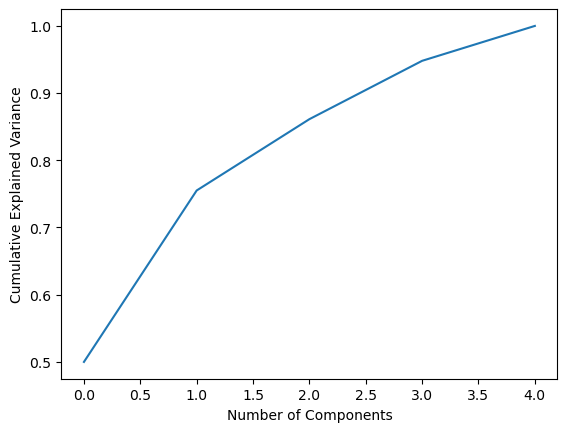

In [126]:
# Fit PCA to your training data
pca = PCA().fit(X_train)

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Create a plot to visualize the cumulative explained variance
plt.plot(cumulative_explained_variance)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

In [127]:
arr = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
list(zip(range(1,len(arr)), arr))

[(1, 49.980000000000004), (2, 75.5), (3, 86.12), (4, 94.80000000000001)]

Mean Squared Error (MSE): 31,831,216.26
R-squared (R²): 0.738
Analysis of Loadings for Principal Components
The weights represent the relationships between original features and principal components:

Component 1:
This component shows strong positive correlations with attributes related to dimensions, weight, and size of the vehicle. It indicates that as one feature increases (like wheel_base, length, width, and curb_weight), the others also tend to increase, suggesting a unified impact on the vehicle's overall size and weight.

Component 2:
This component has a positive correlation with size-related features but a negative correlation with fuel type_gas. It signifies that while attributes like dimensions and weight tend to move together, the presence of fuel_type_gas might impact the vehicle's dimensions in a contrasting manner.

Component 3:
Component 3 demonstrates varied correlations. It shows a mix of positive and negative relationships, particularly with dimensions and a few other attributes. This could suggest some complexities in how these features relate to each other within the dataset.

Component 4:
Component 4 indicates some negative correlations, especially with dimensions, along with a mixed influence on other attributes. It suggests that certain attributes might move inversely concerning the vehicle's dimensions or weight.

Variance Explained by Principal Components
Principal Component 1: 49.98%
Principal Component 2: 75.5%
Principal Component 3: 86.12%
Principal Component 4: 94.8%
Interpretation and Insights
The regression model performs reasonably well, explaining approximately 73.8% of the variance in the vehicle prices.
The MSE value of 31,831,216.26 suggests the average squared difference between predicted and actual prices, indicating the model's prediction accuracy.
Principal components capture a substantial amount of variance, especially Component 3 and Component 4, explaining over 86% and 94% of the variance, respectively.
Component analysis reveals valuable insights into how vehicle dimensions, weight, and fuel type interrelate, offering potential insights into aspects influencing vehicle pricing.
understanding the relationship between various vehicle attributes and their collective impact on pricing, aiding in better pricing strategies or understanding consumer preferences for vehicles with specific features.